# Preparing To Model 

## Challenge: Preparing a dataset for modeling
by: Melissa N 

Data: [Car Data Sales](https://www.kaggle.com/gagandeep16/car-sales/data)

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [116]:
# Make the scatterplot matrix.

# Setting the default plot aesthetics to be prettier.
sns.set_style("white")

In [117]:
df = pd.read_csv('Car_sales.csv')
df.head() #Not using Print statement so that it displays all in one line for all tables 

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [118]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

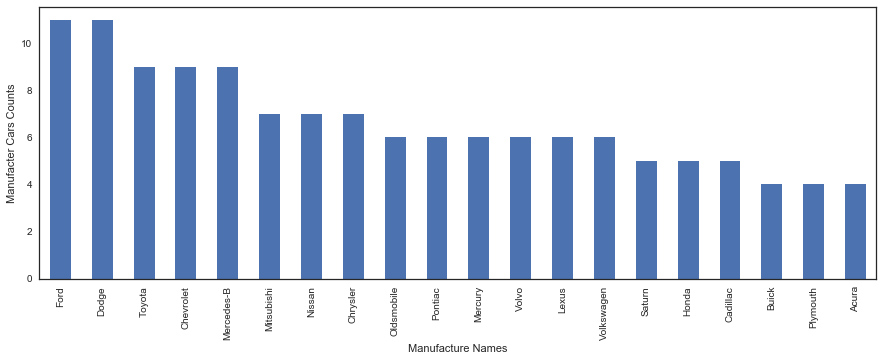

In [119]:
plt.figure(figsize=(15, 5))
df.Manufacturer.value_counts().head(20).plot(kind='bar')
plt.ylabel('Manufacter Cars Counts')
plt.xlabel('Manufacture Names')
plt.show()

We see that that the Manufacturer who makes the most cars in the US is Ford and Dodge, Followed by Toyota, Chevrolet and Mercedes-B.   
Now it will be interesting to see if they are the cars Manufacturers with the most sales or the most expensives cars.   
I will first look at Ford and Dodge and see how the two manufacturers differs or are similar.  

/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


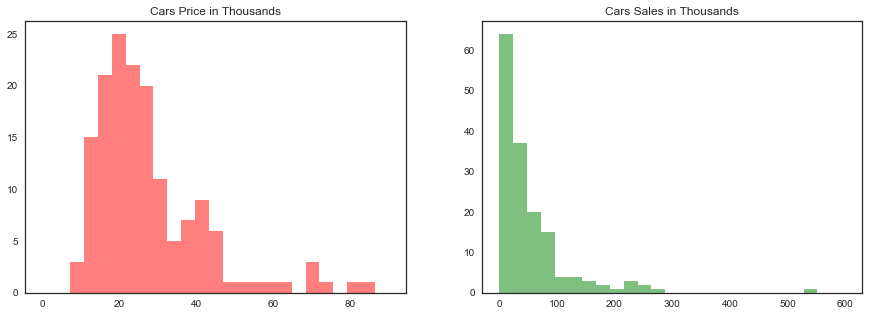

In [120]:
##histogram and boxplot for univariate variable Sales in Thousands

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Price_in_thousands'], range=(0,90), bins=25, color='red', alpha = 0.5)
plt.title('Cars Price in Thousands')
plt.subplot(1, 2, 2)
plt.hist(df['Sales_in_thousands'], range=(0,600), bins=25, color='green', alpha = 0.5)
plt.title('Cars Sales in Thousands')
plt.show()

In [176]:
df['Sales_in_thousands'].describe()

count    157.000000
mean      52.998076
std       68.029422
min        0.110000
25%       14.114000
50%       29.450000
75%       67.956000
max      540.561000
Name: Sales_in_thousands, dtype: float64

## Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.  

### Categorical Variables   

Manufacturer'  
'Model'  
'Vehicle_type'   

### Continuous Variables    

'Sales_in_thousands'   
__year_resale_value'    
'Price_in_thousands'   
'Fuel_capacity'    
'Fuel_efficiency'   



In [122]:
# Take a subset of the data to make plots clearer.
## selecting the columns I want to work with, and assigning them to a new df called Flights.

df_I = df[['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands','Fuel_capacity','Fuel_efficiency']]


In [123]:
df_I.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Fuel_capacity,Fuel_efficiency
0,Acura,Integra,16.919,16.360,Passenger,21.50,13.2,28.0
1,Acura,TL,39.384,19.875,Passenger,28.40,17.2,25.0
2,Acura,CL,14.114,18.225,Passenger,NaN,17.2,26.0
3,Acura,RL,8.588,29.725,Passenger,42.00,18.0,22.0
4,Audi,A4,20.397,22.255,Passenger,23.99,16.4,27.0


                     Sales_in_thousands  __year_resale_value  \
Sales_in_thousands             1.000000            -0.279034   
__year_resale_value           -0.279034             1.000000   
Price_in_thousands            -0.304734             0.953840   
Fuel_capacity                  0.086540             0.325567   
Fuel_efficiency               -0.016764            -0.399880   

                     Price_in_thousands  Fuel_capacity  Fuel_efficiency  
Sales_in_thousands            -0.304734       0.086540        -0.016764  
__year_resale_value            0.953840       0.325567        -0.399880  
Price_in_thousands             1.000000       0.423282        -0.492157  
Fuel_capacity                  0.423282       1.000000        -0.801512  
Fuel_efficiency               -0.492157      -0.801512         1.000000  


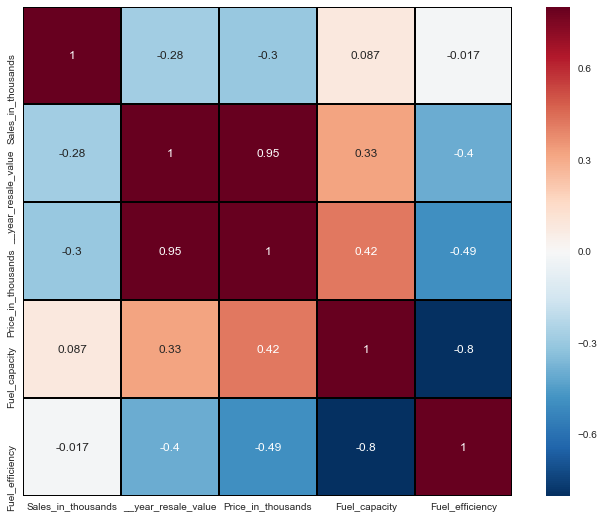

In [124]:
# Make the correlation matrix.
corrmat = df_I.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
plt.show()

In this we can see that the correlation between __year_resale_value and Price_in_thousands in pretty good at 0.95.  
This makes sense since the price of a car has it leaves the lot and one that is already purchased vary depending on how old the car is.   


Another thing to  note, the correlation between Price_in_thousands and Fuel_capacity is 0.42.  
This is important depending on what the customer needs, small cars may need less fuel than big cars and SUV and this may affect their overall price.      


While the correllation between __year_resale_value and Fuel_capacity is 0.33.   
This is a less than the one noted earlier just because an older car is less expensive than the new cars and thus fuel capacity in this case will not be as high as when buying a new car.  


The Correlation between Fuel_capacity and Fuel_efficiency is -0.8. 
That is because people who what a fuel efficient car will not care about it fuel efficiency and vice-versa.   



In [144]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(df['Manufacturer'])


In [145]:
### Turn things into categorical variable (fuel efficient Yes or NO or Low Medium High)
### In the US fuel efficiency last year was 23.6 miles per gallon, on average

features['FuelEff_23plus'] = np.where(df['Fuel_efficiency']>=23.6, 'Yes', 'No')

# Check to make sure it worked.
print(df['Fuel_efficiency'].groupby(features['FuelEff_23plus']).describe())

                count       mean       std   min   25%   50%   75%   max
FuelEff_23plus                                                          
No               69.0  20.318841  2.470370  15.0  19.0  21.0  22.0  23.0
Yes              85.0  26.705882  3.157846  24.0  25.0  26.0  27.0  45.0


In [146]:
### Turn things into categorical variable (fuel Capacity SUV, midsize)
### Smaller cars generally have gas tanks that hold 12 gallons worth of gas, 
#while larger cars can hold 15 or 16 gallons.

features['FuelCap_15plus'] = np.where(df['Fuel_capacity']>=15, 'SUV', 'Midsize')

# Check to make sure it worked.
print(df['Fuel_capacity'].groupby(features['FuelCap_15plus']).describe())

                count       mean       std   min   25%   50%    75%   max
FuelCap_15plus                                                           
Midsize          27.0  13.133333  1.083087  10.3  12.3  13.2  14.15  14.6
SUV             129.0  18.960465  3.484730  15.0  16.6  18.5  20.00  32.0


In [147]:
### Turn Categorical into continuous variable (vehicle type can be turn into binary)
### Department of Transportation's definition of a passenger vehicle, to mean a car or truck, used for passengers, 
### excluding buses and trains.

# Create a better indicator for 'vehicle_type.' Currently it is coded Car and Passenger

features['Passenger_Car'] = np.where(df['Vehicle_type']=='Passenger', 1, 0)

# Check to make sure it worked.
print(df['Vehicle_type'].groupby(features['Passenger_Car']).describe())

              count unique        top freq
Passenger_Car                             
0                41      1        Car   41
1               116      1  Passenger  116


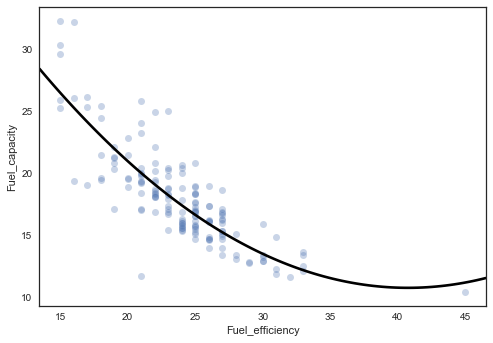

In [168]:
# Find an indicator for 'Distantce Traveled by a car.

### Fuel Efficiency*Fuel Capacity (miles/galon)*galon to see how far you can go on a full gas tank
sns.regplot(
    df['Fuel_efficiency'],
    y=df['Fuel_capacity'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['Max_Distance'] = df['Fuel_efficiency'] * df['Fuel_capacity']

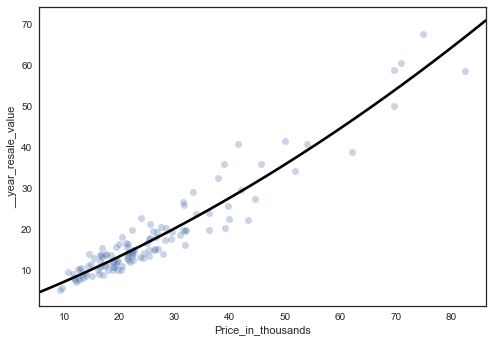

In [169]:
# Find an indicator for Car Depreciation value .
### Price/Year_resale  to see depreciation value of the car 
sns.regplot(
    df['Price_in_thousands'],
    y=df['__year_resale_value'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['Cars_Depreciation'] = df['Price_in_thousands'] / df['__year_resale_value']

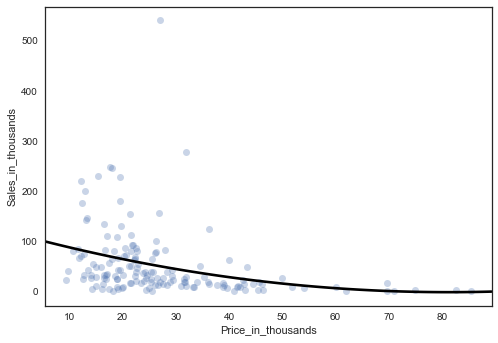

In [170]:
# Find an indicator for Revenue from Sales of new cars .
### Sales in Thousands * Price in Thousands ===> Amount of money gotten from sales 
sns.regplot(
    df['Price_in_thousands'],
    y=df['Sales_in_thousands'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['Sales_Revenue_New'] = df['Sales_in_thousands'] * df['Price_in_thousands']

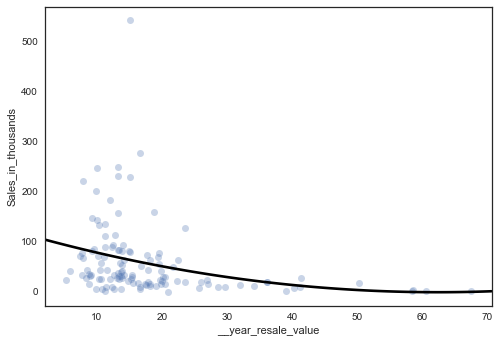

In [171]:
# Find an indicator for Revenue from Sales of older cars .
### Sales in Thousands * Price in Thousands ===> Amount of money gotten from sales 
sns.regplot(
    df['__year_resale_value'],
    y=df['Sales_in_thousands'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['Sales_Revenue_Old'] = df['Sales_in_thousands'] * df['__year_resale_value']

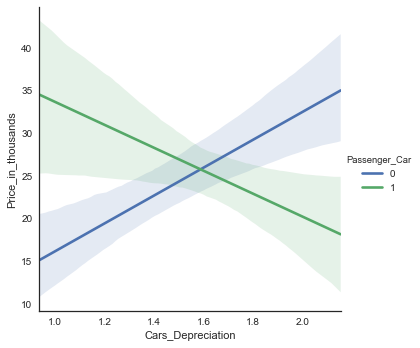

In [172]:
# Create an interaction.
features['Vehicle_Depreciation'] = features['Cars_Depreciation'] * features['Passenger_Car']

# A plot of an interaction.
# Add the 'tvtot' feature to the features data frame for plotting.
features['Price_in_thousands'] = df['Price_in_thousands']
sns.lmplot(
    x='Cars_Depreciation',
    y='Price_in_thousands',
    hue='Passenger_Car',
    data=features,
    scatter=False
)
plt.show()